<h1> Using Scikit learn

In [156]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import add_dummy_feature
import numpy as np
iris=load_iris(as_frame=True)
X=iris.data
Y=iris.target_names[iris.target]

In [157]:
from sklearn.preprocessing import add_dummy_feature
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=add_dummy_feature(X)
scaler=StandardScaler()
trainx,testx,trainy,testy= train_test_split(X,Y,test_size=0.5)
validx=testx[:len(testx)//2]
validy=testy[:len(testy)//2]
testx=testx[len(testx)//2:]
testy=testy[len(testy)//2:]

In [158]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
validy_encoded=ohe.fit_transform(validy.reshape(-1,1),)
trainy_encoded=ohe.fit_transform(trainy.reshape(-1,1),)
testy_encoded=ohe.fit_transform(testy.reshape(-1,1),)

In [159]:
ohe.categories_

[array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]

In [160]:
def softmaxpred(theta,x):
    score=x@theta 
    predicts=[]
    for i in range(len(score)):
        if np.argmax(score[i])==0:
            predicts.append('setosa')
        if np.argmax(score[i])==1:
            predicts.append('versicolor')
        if np.argmax(score[i])==2:
            predicts.append('virginica')
    return np.array(predicts)


In [161]:
softmaxpred(theta=theta,x=validx)

array(['setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor'], dtype='<U10')

In [162]:
def gradientvector(probability,predicts,x):
    gradient=x.T@(probability-predicts)
    return gradient

In [163]:
theta=np.random.randn(5,3) #(5,3)= (no of features +1(for intercept), no of outputs)
predicts=softmaxpred(theta=theta,x=trainx)

In [164]:
def softmaxproba(logit):
    exponentials=np.exp(logit)
    return exponentials/np.sum(exponentials,axis=1,keepdims=True)

In [165]:
from sklearn.metrics import accuracy_score
best_score=0
scores=[]
gradients=[]
theta_paths=[]
n_epochs=5000
best_epoch=0
for epoch in range(n_epochs):
    validy_pred=softmaxpred(theta=theta,x=validx)
    score= accuracy_score(validy,validy_pred)
    scores.append(score)
    if (score>best_score):
        best_score=score
        best_theta= theta
        best_epoch=epoch
    graident=(trainx.T@(softmaxproba(trainx@theta)-trainy_encoded))/len(trainx)
    gradients.append(graident)
    theta=theta-0.01*graident
    theta_paths.append(theta)
    
    

In [166]:
testx

array([[1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.5, 3.5, 1.3, 0.2],
       [1. , 6.8, 3.2, 5.9, 2.3],
       [1. , 6.8, 3. , 5.5, 2.1],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 7.2, 3.6, 6.1, 2.5],
       [1. , 5.1, 3.8, 1.6, 0.2],
       [1. , 6.3, 2.8, 5.1, 1.5],
       [1. , 6.6, 2.9, 4.6, 1.3],
       [1. , 7.7, 3. , 6.1, 2.3],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 7. , 3.2, 4.7, 1.4],
       [1. , 6.1, 3. , 4.9, 1.8],
       [1. , 7.3, 2.9, 6.3, 1.8],
       [1. , 5.6, 2.8, 4.9, 2. ],
       [1. , 5. , 2.3, 3.3, 1. ],
       [1. , 5.9, 3. , 5.1, 1.8],
       [1. , 5.4, 3.7, 1.5, 0.2],
       [1. , 6.8, 2.8, 4.8, 1.4],
       [1. , 6. , 2.2, 5. , 1.5],
       [1. , 7.7, 2.6, 6.9, 2.3],
       [1. , 6.4, 2.9, 4.3, 1.3],
       [1. , 5.2, 2.7, 3.9, 1.4],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 6.9, 3.1, 5.1, 2.3],
       [1. , 7.7, 2.8, 6.7, 2. ],
       [1. , 5.5, 2.5, 4. , 1.3],
       [1. , 6.7, 2.5, 5.8, 1.8],
       [1. , 5

In [167]:
theta_paths

[array([[ 0.1508237 ,  0.59432491,  1.53178319],
        [ 1.56770571, -1.20787757,  0.32692597],
        [ 0.12019439,  0.10964284,  0.35388907],
        [-1.58377737,  1.6257664 , -0.54126118],
        [ 1.00689547, -0.88143193,  1.94139856]]),
 array([[ 0.14925195,  0.5974925 ,  1.53018736],
        [ 1.55744382, -1.18884923,  0.31815952],
        [ 0.11588414,  0.11860565,  0.34923652],
        [-1.59221806,  1.63941609, -0.54647018],
        [ 1.00408122, -0.87714955,  1.93993043]]),
 array([[ 0.14771799,  0.60064793,  1.52856588],
        [ 1.54741633, -1.16989613,  0.30923392],
        [ 0.11168519,  0.12753429,  0.34450683],
        [-1.60048638,  1.65300346, -0.55178922],
        [ 1.00132274, -0.87288663,  1.93842599]]),
 array([[ 0.14621612,  0.60378675,  1.52692893],
        [ 1.53758815, -1.15104636,  0.30021233],
        [ 0.10758038,  0.13641607,  0.33972986],
        [-1.608607  ,  1.66650519, -0.55717033],
        [ 0.99861199, -0.86865052,  1.93690063]]),
 array([[ 0.

In [168]:
theta_paths[-1]

array([[ 0.33660451,  1.15973442,  0.78059288],
       [ 1.72114349,  0.0412423 , -1.07563167],
       [ 1.13289079,  0.6796617 , -1.22882618],
       [-3.13035512,  0.71396049,  1.91712248],
       [ 0.28623643, -1.25865476,  3.03928044]])

In [169]:
best_epoch

1586

In [176]:
theta_paths[0], best_theta

(array([[ 0.1508237 ,  0.59432491,  1.53178319],
        [ 1.56770571, -1.20787757,  0.32692597],
        [ 0.12019439,  0.10964284,  0.35388907],
        [-1.58377737,  1.6257664 , -0.54126118],
        [ 1.00689547, -0.88143193,  1.94139856]]),
 array([[ 0.21048662,  0.90541858,  1.1610266 ],
        [ 1.4855283 , -0.30236693, -0.49640726],
        [ 0.50750252,  0.61109183, -0.53486805],
        [-2.39942475,  1.12498497,  0.77516763],
        [ 0.64927747, -1.15522743,  2.57281206]]))

In [184]:
accuracy_score(testy,softmaxpred(theta_paths[best_epoch],testx))


0.9473684210526315

Text(1586.05, 0.922972972972973, 'best_score')

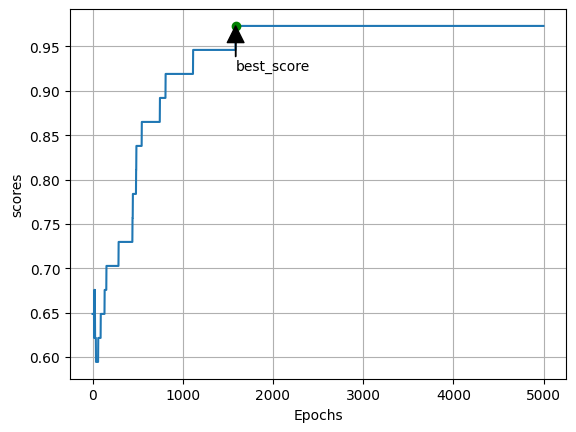

In [199]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.plot(best_epoch,best_score,marker='o',color="green")
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("scores")
plt.annotate("best_score",xy=(best_epoch,best_score),xytext=(best_epoch+0.05,best_score-0.05),arrowprops=dict(facecolor="black",width=0.2))